In [1]:
import os

In [2]:
os.getcwd()

'D:\\Ruchi\\Python\\Time Series analysis'

In [8]:
import pandas as pd

In [9]:
series =pd.read_csv('Data1\\Data1\\section 3\\female_birth.csv', header=0)

In [10]:
print(series.head())

         Date  Daily total female births in California, 1959
0  1959-01-01                                             35
1  1959-01-02                                             32
2  1959-01-03                                             30
3  1959-01-04                                             31
4  1959-01-05                                             44


In [11]:
print(series.size)

732


In [13]:
print(series.describe())

       Daily total female births in California, 1959
count                                     366.000000
mean                                       47.218579
std                                       100.472534
min                                        23.000000
25%                                        37.000000
50%                                        42.000000
75%                                        46.000000
max                                      1959.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
data = pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #separate year and month
data = pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
print(data.dtypes)

#Passengers    int64
dtype: object


In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [20]:
data = {'date': ['2015-05/-01  18:47:05.069255', '2014-04-07  18:47:05.119944', '2019-06-12 18:04:18.457845'] ,
        'battle_deaths': [34,25,45]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
print(df)

                           date  battle_deaths
0  2015-05/-01  18:47:05.069255             34
1   2014-04-07  18:47:05.119944             25
2    2019-06-12 18:04:18.457845             45


In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df.index = df['date']
del df['date']
df

,battle_deaths
date,
2015-05-01 18:47:05.069255,34
2014-04-07 18:47:05.119944,25
2019-06-12 18:04:18.457845,45


In [23]:
#count the number of observation per timestamp
df.groupby(level=0).count()

,battle_deaths
date,
2014-04-07 18:47:05.119944,1
2015-05-01 18:47:05.069255,1
2019-06-12 18:04:18.457845,1


In [24]:
#observation in 2014
df['2014']

,battle_deaths
date,
2014-04-07 18:47:05.119944,25


In [26]:
#observation after may 5th 2014
df[pd.datetime(2014, 5, 3):]

KeyError: Timestamp('2014-05-03 00:00:00')

In [27]:
df.truncate(after='5/3/2014')

ValueError: truncate requires a sorted index

In [28]:
#average date at different date
df.resample('D').mean()

,battle_deaths
date,
2014-04-07,25.0
2014-04-08,NaN
2014-04-09,NaN
2014-04-10,NaN
2014-04-11,NaN
...,...
2019-06-08,NaN
2019-06-09,NaN
2019-06-10,NaN


In [29]:
df.resample('D').sum()

,battle_deaths
date,
2014-04-07,25
2014-04-08,0
2014-04-09,0
2014-04-10,0
2014-04-11,0
...,...
2019-06-08,0
2019-06-09,0
2019-06-10,0


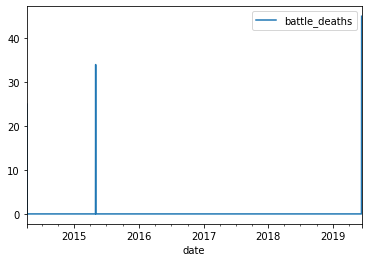

In [30]:
df.resample('D').sum().plot()